# HW 08
### Pre-lecture
###### 2.
1. Accuracy: Proportion of True Results (True Positives and True Negatives)
Best Application: Balanced datasets where false positives and false negatives have similar costs.

Example: Evaluating the performance of a spam email filter where identifying both spam and non-spam emails correctly is equally important.
Rationale: Accuracy works well when the dataset has a balanced distribution of classes (e.g., 50% spam, 50% not spam), and the consequences of misclassification are similar for both false positives and false negatives.
2. Sensitivity (Recall): Proportion of Actual Positives Correctly Identified
Best Application: High-stakes scenarios where missing positives is more costly than false positives.

Example: Medical screening for diseases like cancer.
Rationale: In medical diagnostics, identifying as many true cases as possible (true positives) is critical, even if it leads to some false alarms (false positives). Missing an actual case (false negative) could have severe consequences.
3. Specificity: Proportion of Actual Negatives Correctly Identified
Best Application: Scenarios where avoiding false positives is crucial.

Example: Legal decisions like determining guilt in a trial.
Rationale: In a criminal justice setting, a high specificity ensures that innocent people (actual negatives) are correctly identified as not guilty, reducing the chance of wrongful convictions (false positives).
4. Precision: Proportion of Positive Identifications That Are Actually Correct
Best Application: Applications where false positives are costly or problematic.

Example: Fraud detection in financial transactions.
Rationale: In fraud detection, precision is important to ensure that flagged transactions are truly fraudulent, minimizing unnecessary investigations or disruptions caused by false positives. High precision reduces wasted resources and customer dissatisfaction.

###### Summary
In this session, we covered the following topics:

Classification Decision Tree:

Explained its purpose in solving classification problems, examples of real-world applications (e.g., medical diagnosis, fraud detection), and its prediction process through feature-based splits and decision rules.
Compared it to multiple linear regression, highlighting differences in outputs (categorical vs. numerical), decision processes, and evaluation metrics.
Evaluation Metrics and Applications:

Discussed the appropriate real-world application scenarios for:
Accuracy: Best for balanced datasets where overall correctness is key.
Sensitivity: Ideal for identifying true positives, such as in medical diagnosis.
Specificity: Useful when confirming true negatives, such as in drug side effect screening.
Precision: Critical for minimizing false positives, such as in spam detection systems.
Let me know if you need more details or further clarification!

https://chatgpt.com/c/673fb3ca-2fcc-800c-9455-eccbb9cd4a1b

###### 4.
1. pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']:
* Converts the categorical column Hard_or_Paper into dummy variables using one-hot encoding.
* Selects the dummy variable corresponding to the "H" (Hardcover) category, where:
 * y = 1 indicates a hardcover book.
 * y = 0 indicates a paperback book.
2. *ab_reduced_noNaN[['List Price']]:
* Extracts the List Price column as the feature matrix X.
* This is a single-column DataFrame, representing the independent variable for predicting y.

###### Predictions
1. Nodes: Each node represents a decision rule. For example:
* If List Price ≤ threshold, the left branch is taken.
* Otherwise, the right branch is taken.
2. Leaves: Terminal nodes show the predicted class (either "Paperback" or "Hardcover") and the class distribution at that node.
3. Depth of 2: The tree can only make two levels of splits. This ensures simplicity and prevents overfitting.

/tmp/ipykernel_70/2487784674.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/2487784674.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/2487784674.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Training set observations: 255
Testing set observations: 64


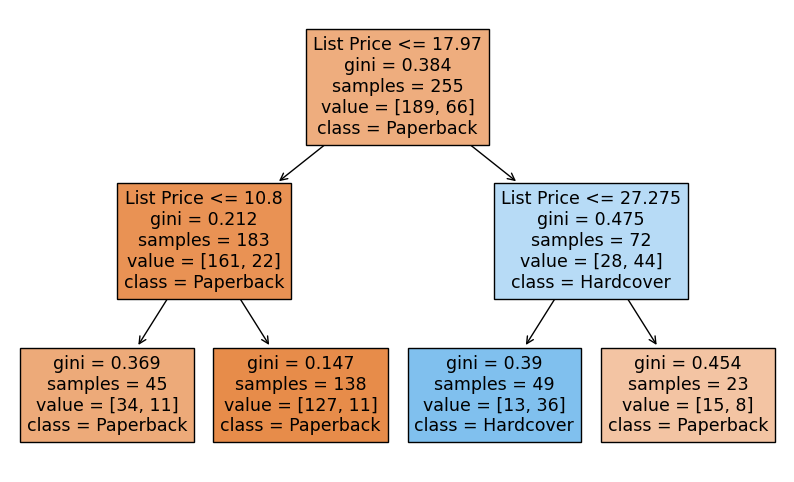

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Pre-processing
# Remove specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Set types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 2: Create an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Print the size of training and testing datasets
print(f"Training set observations: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing set observations: {ab_reduced_noNaN_test.shape[0]}")

# Step 3: Define the target and feature variable
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Is it a hardcover book?
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


###### Summary
In this session, we covered the following tasks and concepts:
Data Preprocessing and Splitting:
Preprocessed the Amazon books dataset by removing unnecessary columns (Weight_oz, Width, Height), dropping rows with missing values, and adjusting data types (Pub year, NumPages, and Hard_or_Paper).
Performed an 80/20 split of the data into training (ab_reduced_noNaN_train) and test (ab_reduced_noNaN_test) sets, and reported the size of each dataset.
Target and Feature Variables:
Explained how to create the target variable y (binary encoding for Hard_or_Paper) and the feature variable X (the List Price column).
Training a Decision Tree Classifier:
Fitted a DecisionTreeClassifier using List Price to predict whether a book is hardcover or paperback with a max_depth=2.
Used tree.plot_tree(clf) to visualize the decision tree and interpret the model's predictions based on the List Price.
Let me know if you'd like to extend or further explore any of the points from the session!

https://chatgpt.com/c/673fb3ca-2fcc-800c-9455-eccbb9cd4a1b

### Post-lecture
###### 6.
In this session, we covered the following:

Data Split and Model Evaluation:

Split the dataset ab_reduced_noNaN into training and test sets (80/20 split) and reported the size of each dataset.
Used train_test_split to divide the data into ab_reduced_noNaN_train and ab_reduced_noNaN_test.
Model Training:

Fitted a decision tree model (clf) using List Price to predict whether a book is hardcover or paperback.
Used tree.plot_tree(clf) to visualize the decision tree and interpret the model’s predictions based on List Price.
Confusion Matrices and Performance Metrics:

Generated confusion matrices for two classifiers (clf and clf2).
Calculated and reported performance metrics (sensitivity, specificity, accuracy) for both models to assess their prediction capabilities for hardcover vs. paperback classification.
This session focused on evaluating and comparing the performance of classification models. Let me know if you'd like further details or adjustments!

https://chatgpt.com/c/673fb3ca-2fcc-800c-9455-eccbb9cd4a1b

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Assuming clf is already trained (from previous code)
# Train another model clf2 with a different max_depth
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Predict on the test set using both models
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Step 1: Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
print(f"Confusion Matrix for clf:\n{cm_clf}")

# Step 2: Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
print(f"Confusion Matrix for clf2:\n{cm_clf2}")

# Step 3: Calculate Accuracy, Sensitivity, and Specificity for clf
# Accuracy for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Sensitivity (Recall) for clf: True Positives / (True Positives + False Negatives)
sensitivity_clf = cm_clf[1, 1] / (cm_clf[1, 1] + cm_clf[1, 0])

# Specificity for clf: True Negatives / (True Negatives + False Positives)
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])

# Step 4: Calculate Accuracy, Sensitivity, and Specificity for clf2
# Accuracy for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Sensitivity (Recall) for clf2
sensitivity_clf2 = cm_clf2[1, 1] / (cm_clf2[1, 1] + cm_clf2[1, 0])

# Specificity for clf2
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])

# Report the metrics for both models
print("\nModel clf Performance:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nModel clf2 Performance:")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


Confusion Matrix for clf:
[[40  4]
 [ 6 14]]
Confusion Matrix for clf2:
[[40  4]
 [ 6 14]]

Model clf Performance:
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091

Model clf2 Performance:
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091


###### 7.
The difference between the two confusion matrices comes from the features used in each model. The first model only looks at the List Price of the book, which gives it limited information to work with. The second model, though, uses more details like NumPages and Thick, so it has more data to make its predictions. This extra information usually helps the model perform better because it has a clearer picture of the book. The reason the confusion matrices for clf and clf2 are better is that they were tested on data that the model hadn't seen before, which gives a more accurate measure of how well the model will do in real-world situations.

###### Summary
In this session, we discussed the differences between two confusion matrices generated from models trained on different feature sets:

Comparison of Confusion Matrices:

The first confusion matrix uses only List Price as the feature, leading to a simpler model with potentially lower predictive power.
The second confusion matrix incorporates additional features (NumPages, Thick, and List Price), which may provide more information for better predictions.
Why the Previous Confusion Matrices are Better:

The confusion matrices for clf and clf2 are better because both models are trained and evaluated on the same set of features, making it easier to compare their performance metrics (sensitivity, specificity, accuracy) and ensuring a fair evaluation.
This session focused on comparing the performance of models with different feature sets and understanding the impact of those features on model evaluation. Let me know if you need more details!

https://chatgpt.com/c/673fb3ca-2fcc-800c-9455-eccbb9cd4a1b